<a href="https://colab.research.google.com/github/pratama008/UAS-BENGKOD-DS01-2-/blob/main/UAS_BENGKOD_DS01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA: PRATAMA RIZQY FAUZAN

NIM: A11.2021.13444

BENGKOD DS 01

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

1) PENGUMPULAN DATA

In [35]:
df = pd.read_csv("water_potability.csv")

2) MENELAAH DATA

In [36]:
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [37]:
print("Jumlah baris dan kolom:")
df.shape

Jumlah baris dan kolom:


(3276, 10)

In [38]:
print("Jumlah nilai unik per kolom:")
df.nunique()

Jumlah nilai unik per kolom:


ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [39]:
print("Contoh data:")
df.head()

Contoh data:


ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [40]:
print("Statistik deskriptif:")
df.describe()

Statistik deskriptif:


ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

3) VALIDASI DAN VISUALISASI DATA

In [41]:
print("Cek missing values:")
print(df.isnull().sum())

Cek missing values:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [42]:
# Imputasi missing values dengan mean
df.fillna(df.mean(), inplace=True)
print("Cek missing values setelah imputasi:")
print(df.isnull().sum())

Cek missing values setelah imputasi:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


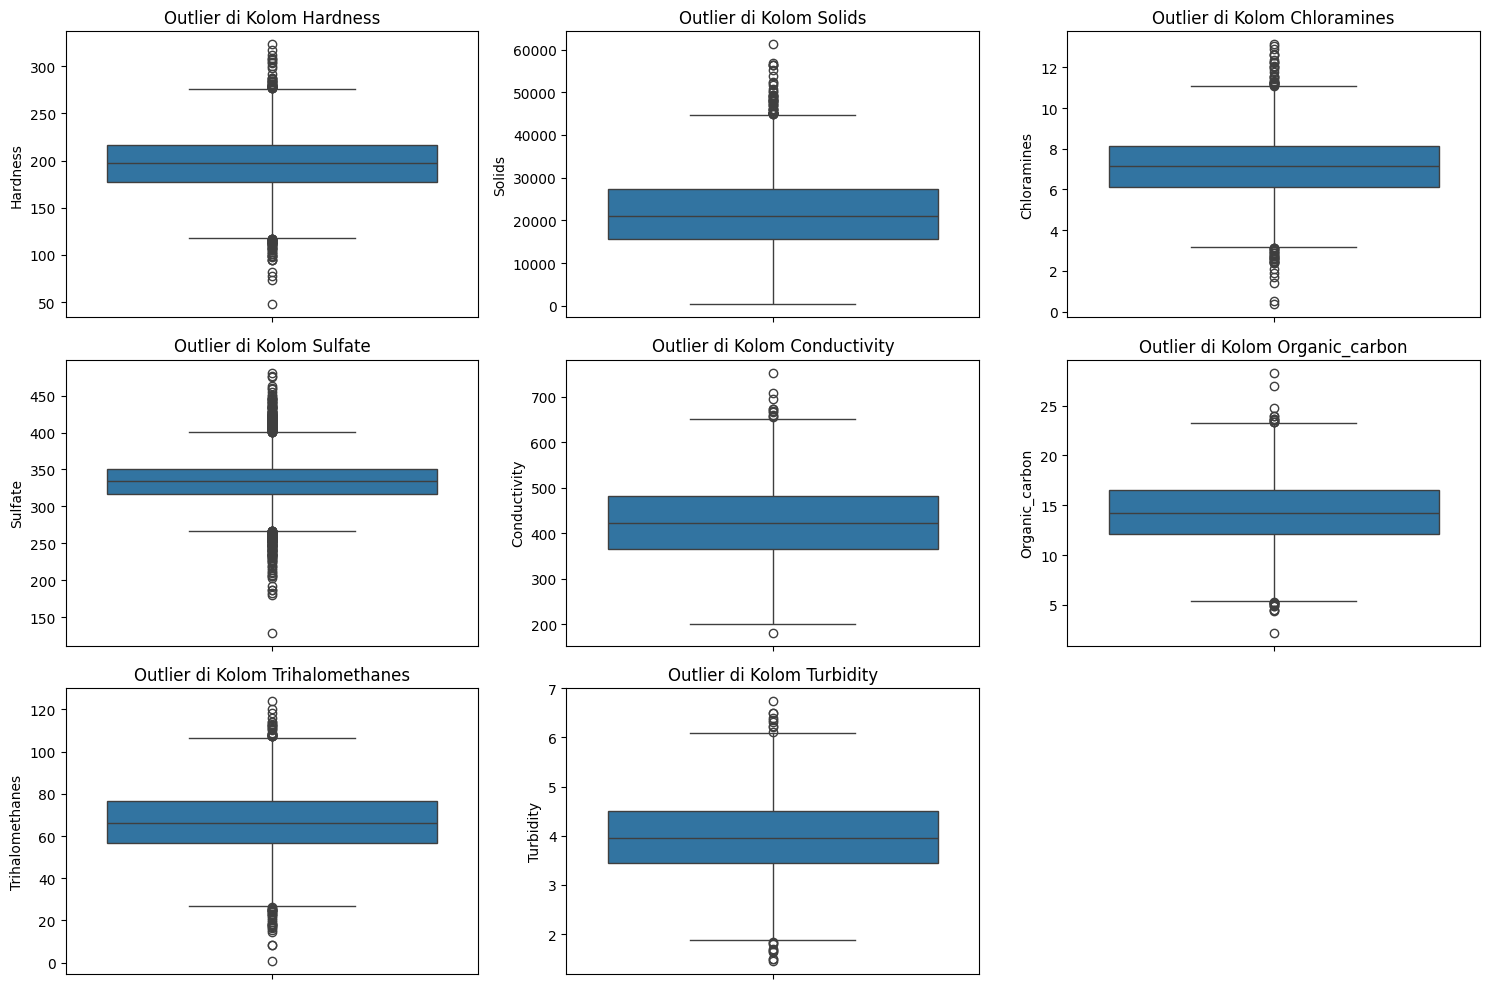

In [43]:
# Cek outlier menggunakan boxplot
plt.figure(figsize=(15, 10))
for i, column in enumerate(["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(f"Outlier di Kolom {column}")
plt.tight_layout()
plt.show()

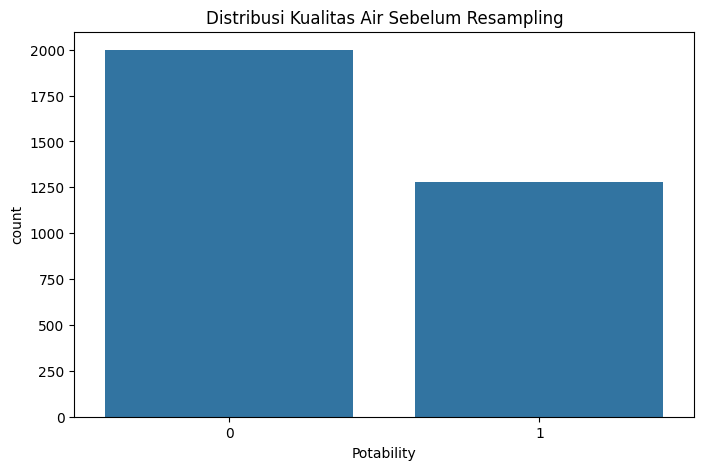

In [44]:
# Visualisasi distribusi data kualitas air sebelum resampling
plt.figure(figsize=(8, 5))
sns.countplot(x='Potability', data=df)
plt.title("Distribusi Kualitas Air Sebelum Resampling")
plt.show()

4) MENENTUKAN OBJEK DATA

In [45]:
# Menentukan fitur dan target
features = ["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]
target = "Potability"

X = df[features]
y = df[target]

print("\nFitur yang digunakan:", features)
print("Target yang diprediksi:", target)


Fitur yang digunakan: ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
Target yang diprediksi: Potability


5) MEMBERSIHKAN DATA

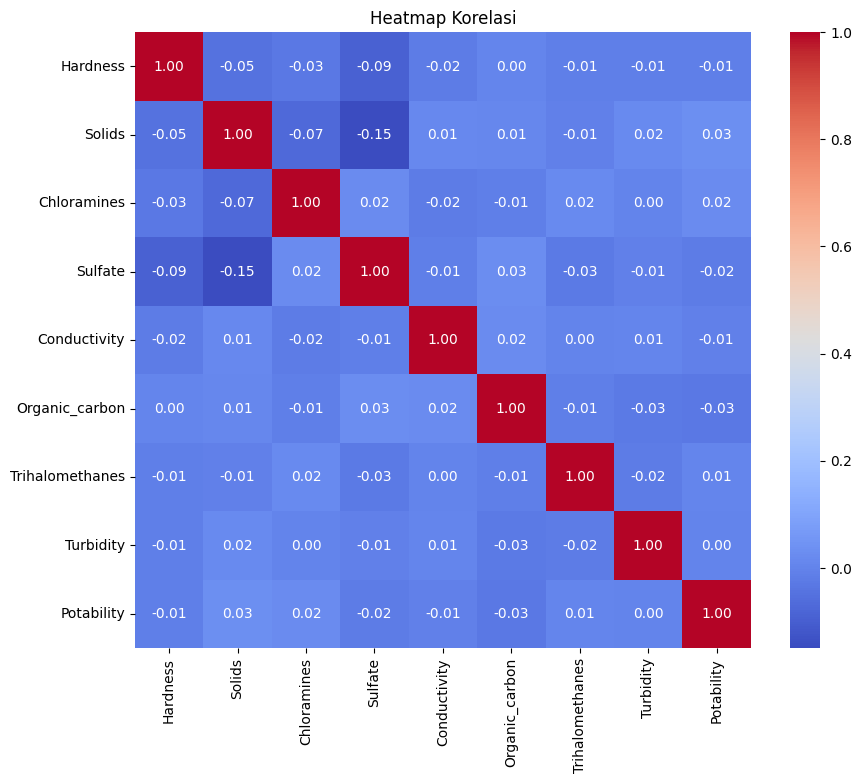

In [46]:
# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap Korelasi")
plt.show()

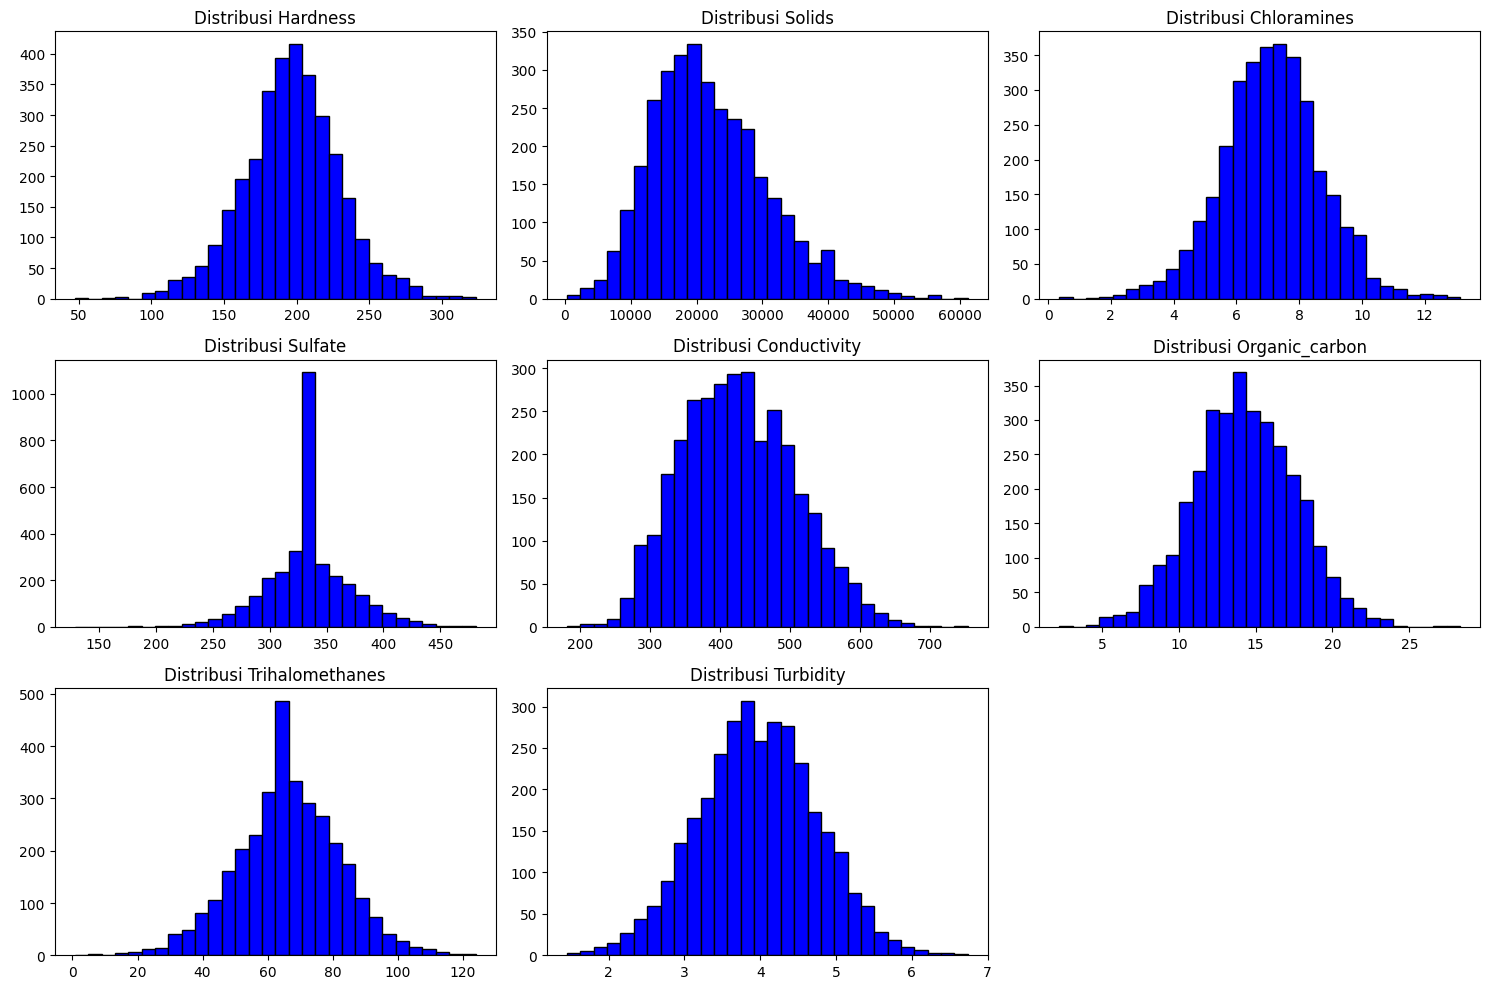

In [47]:
# Visualisasi distribusi atribut dengan histogram
plt.figure(figsize=(15, 10))
for i, column in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[column], bins=30, color='blue', edgecolor='black')
    plt.title(f"Distribusi {column}")
plt.tight_layout()
plt.show()

In [48]:
# Cek outlier menggunakan IQR
print("\nDeteksi Outlier:")
outlier_columns = []
for column in ["Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"{column}: {len(outliers)} outliers")
    outlier_columns.append(column) if len(outliers) > 0 else None


Deteksi Outlier:
Hardness: 83 outliers
Solids: 47 outliers
Chloramines: 61 outliers
Sulfate: 264 outliers
Conductivity: 11 outliers
Organic_carbon: 25 outliers
Trihalomethanes: 54 outliers
Turbidity: 19 outliers


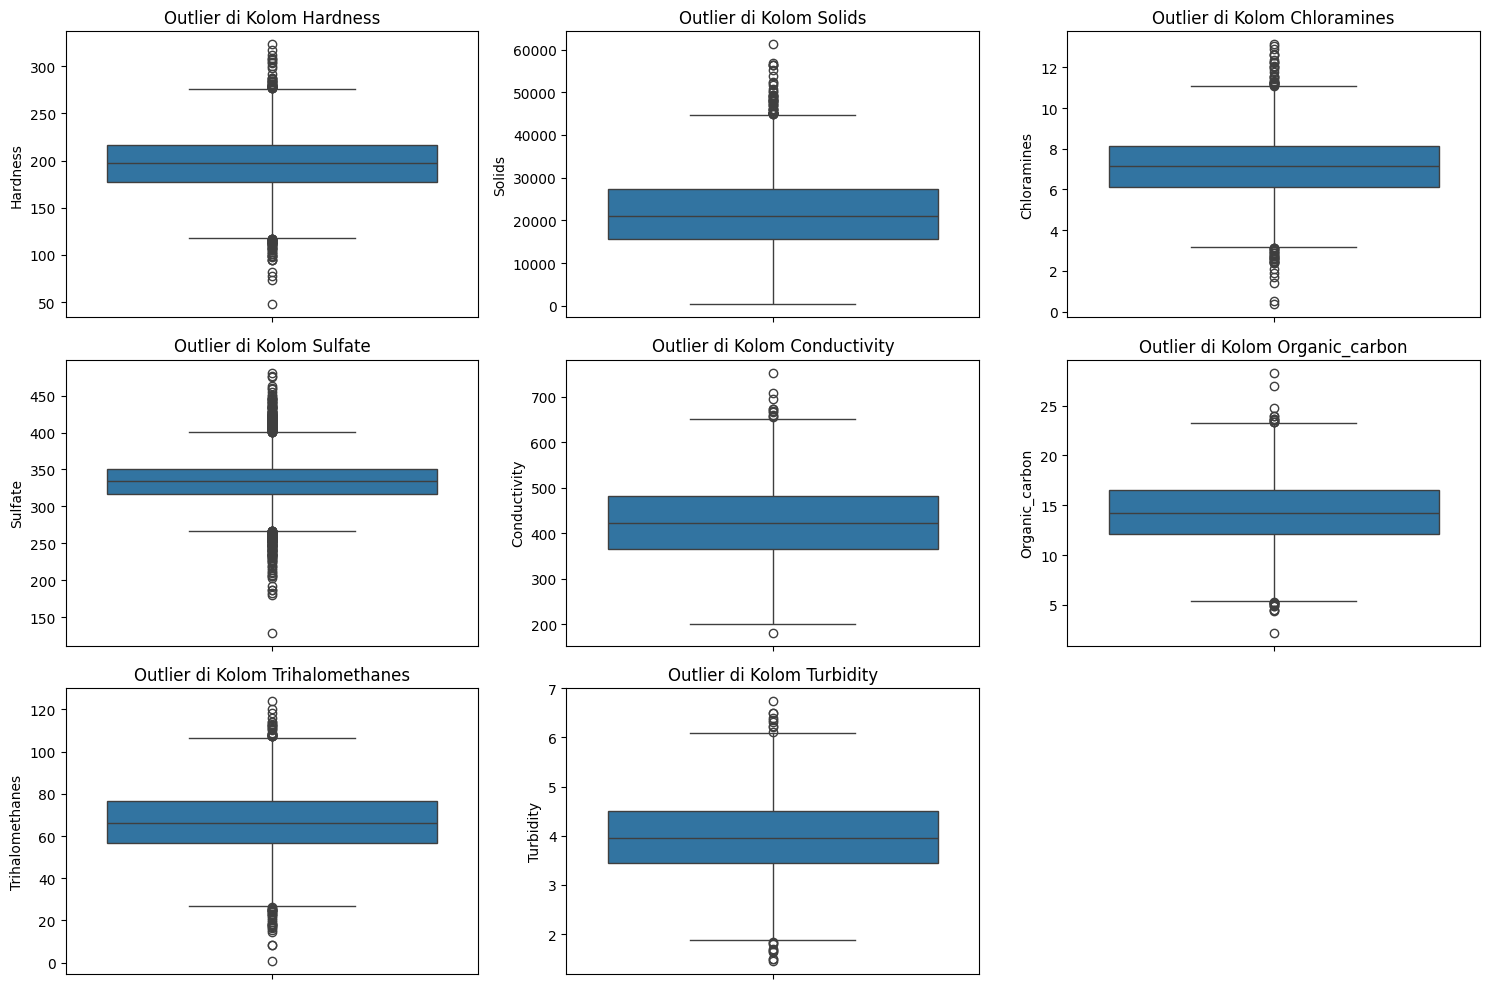

In [49]:
# Visualisasi boxplot setelah deteksi outlier
plt.figure(figsize=(15, 10))
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(f"Outlier di Kolom {column}")
plt.tight_layout()
plt.show()

In [50]:
# Normalisasi data menggunakan Min-Max Scaling
scaler = MinMaxScaler()
data_normalized = df.copy()
data_normalized[outlier_columns] = scaler.fit_transform(df[outlier_columns])

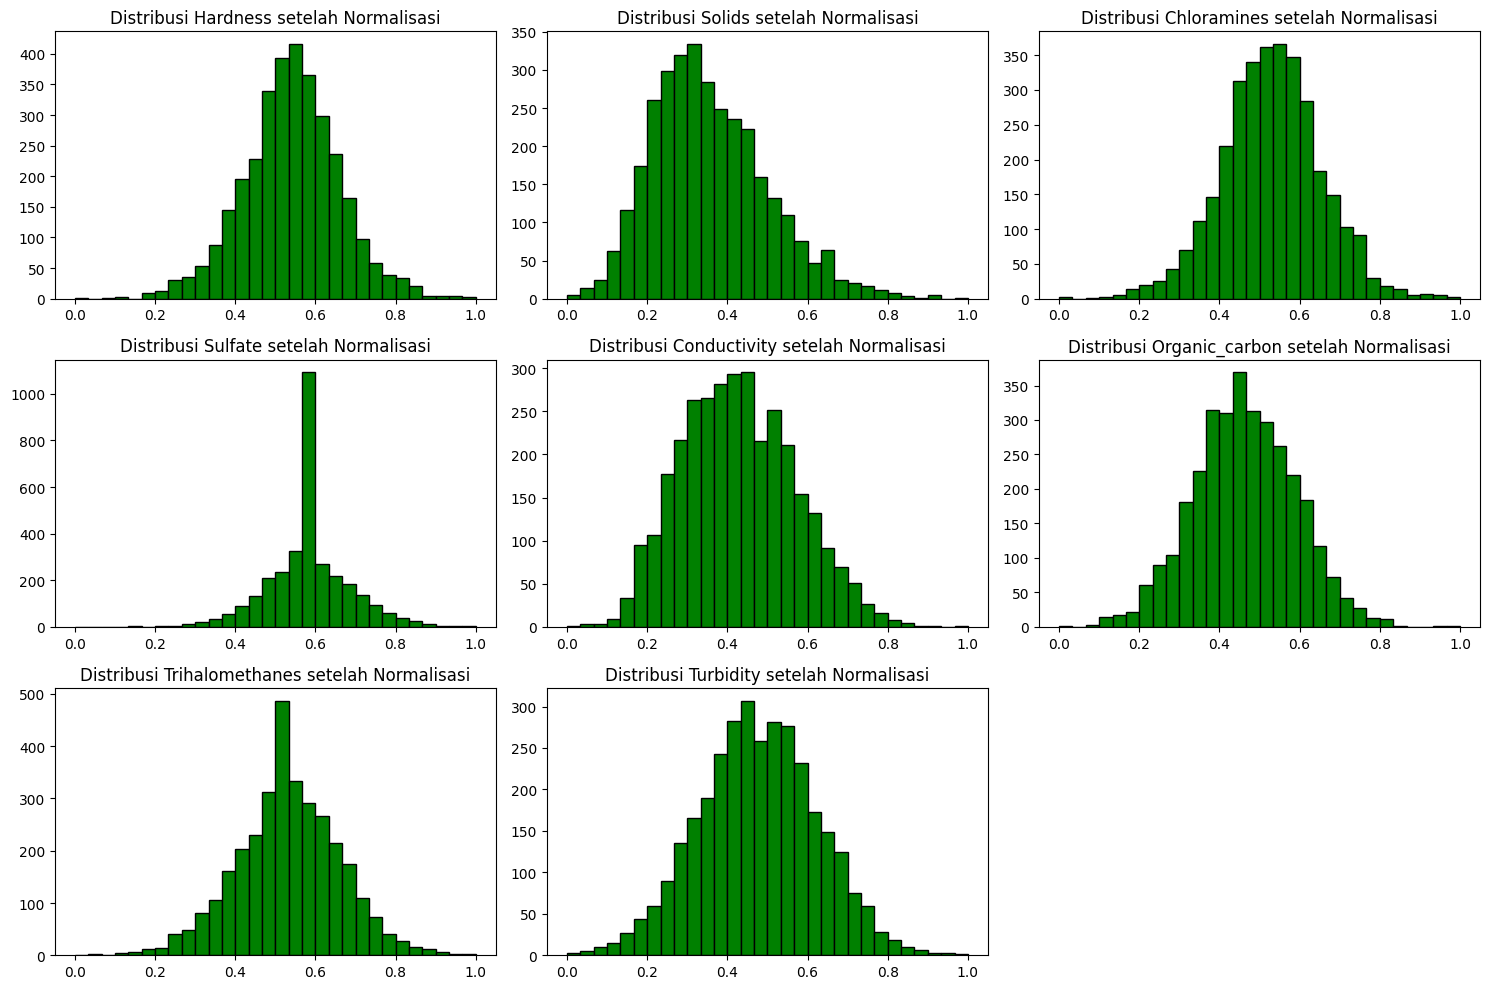

In [51]:
# Visualisasi distribusi setelah normalisasi
plt.figure(figsize=(15, 10))
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(data_normalized[column], bins=30, color='green', edgecolor='black')
    plt.title(f"Distribusi {column} setelah Normalisasi")
plt.tight_layout()
plt.show()

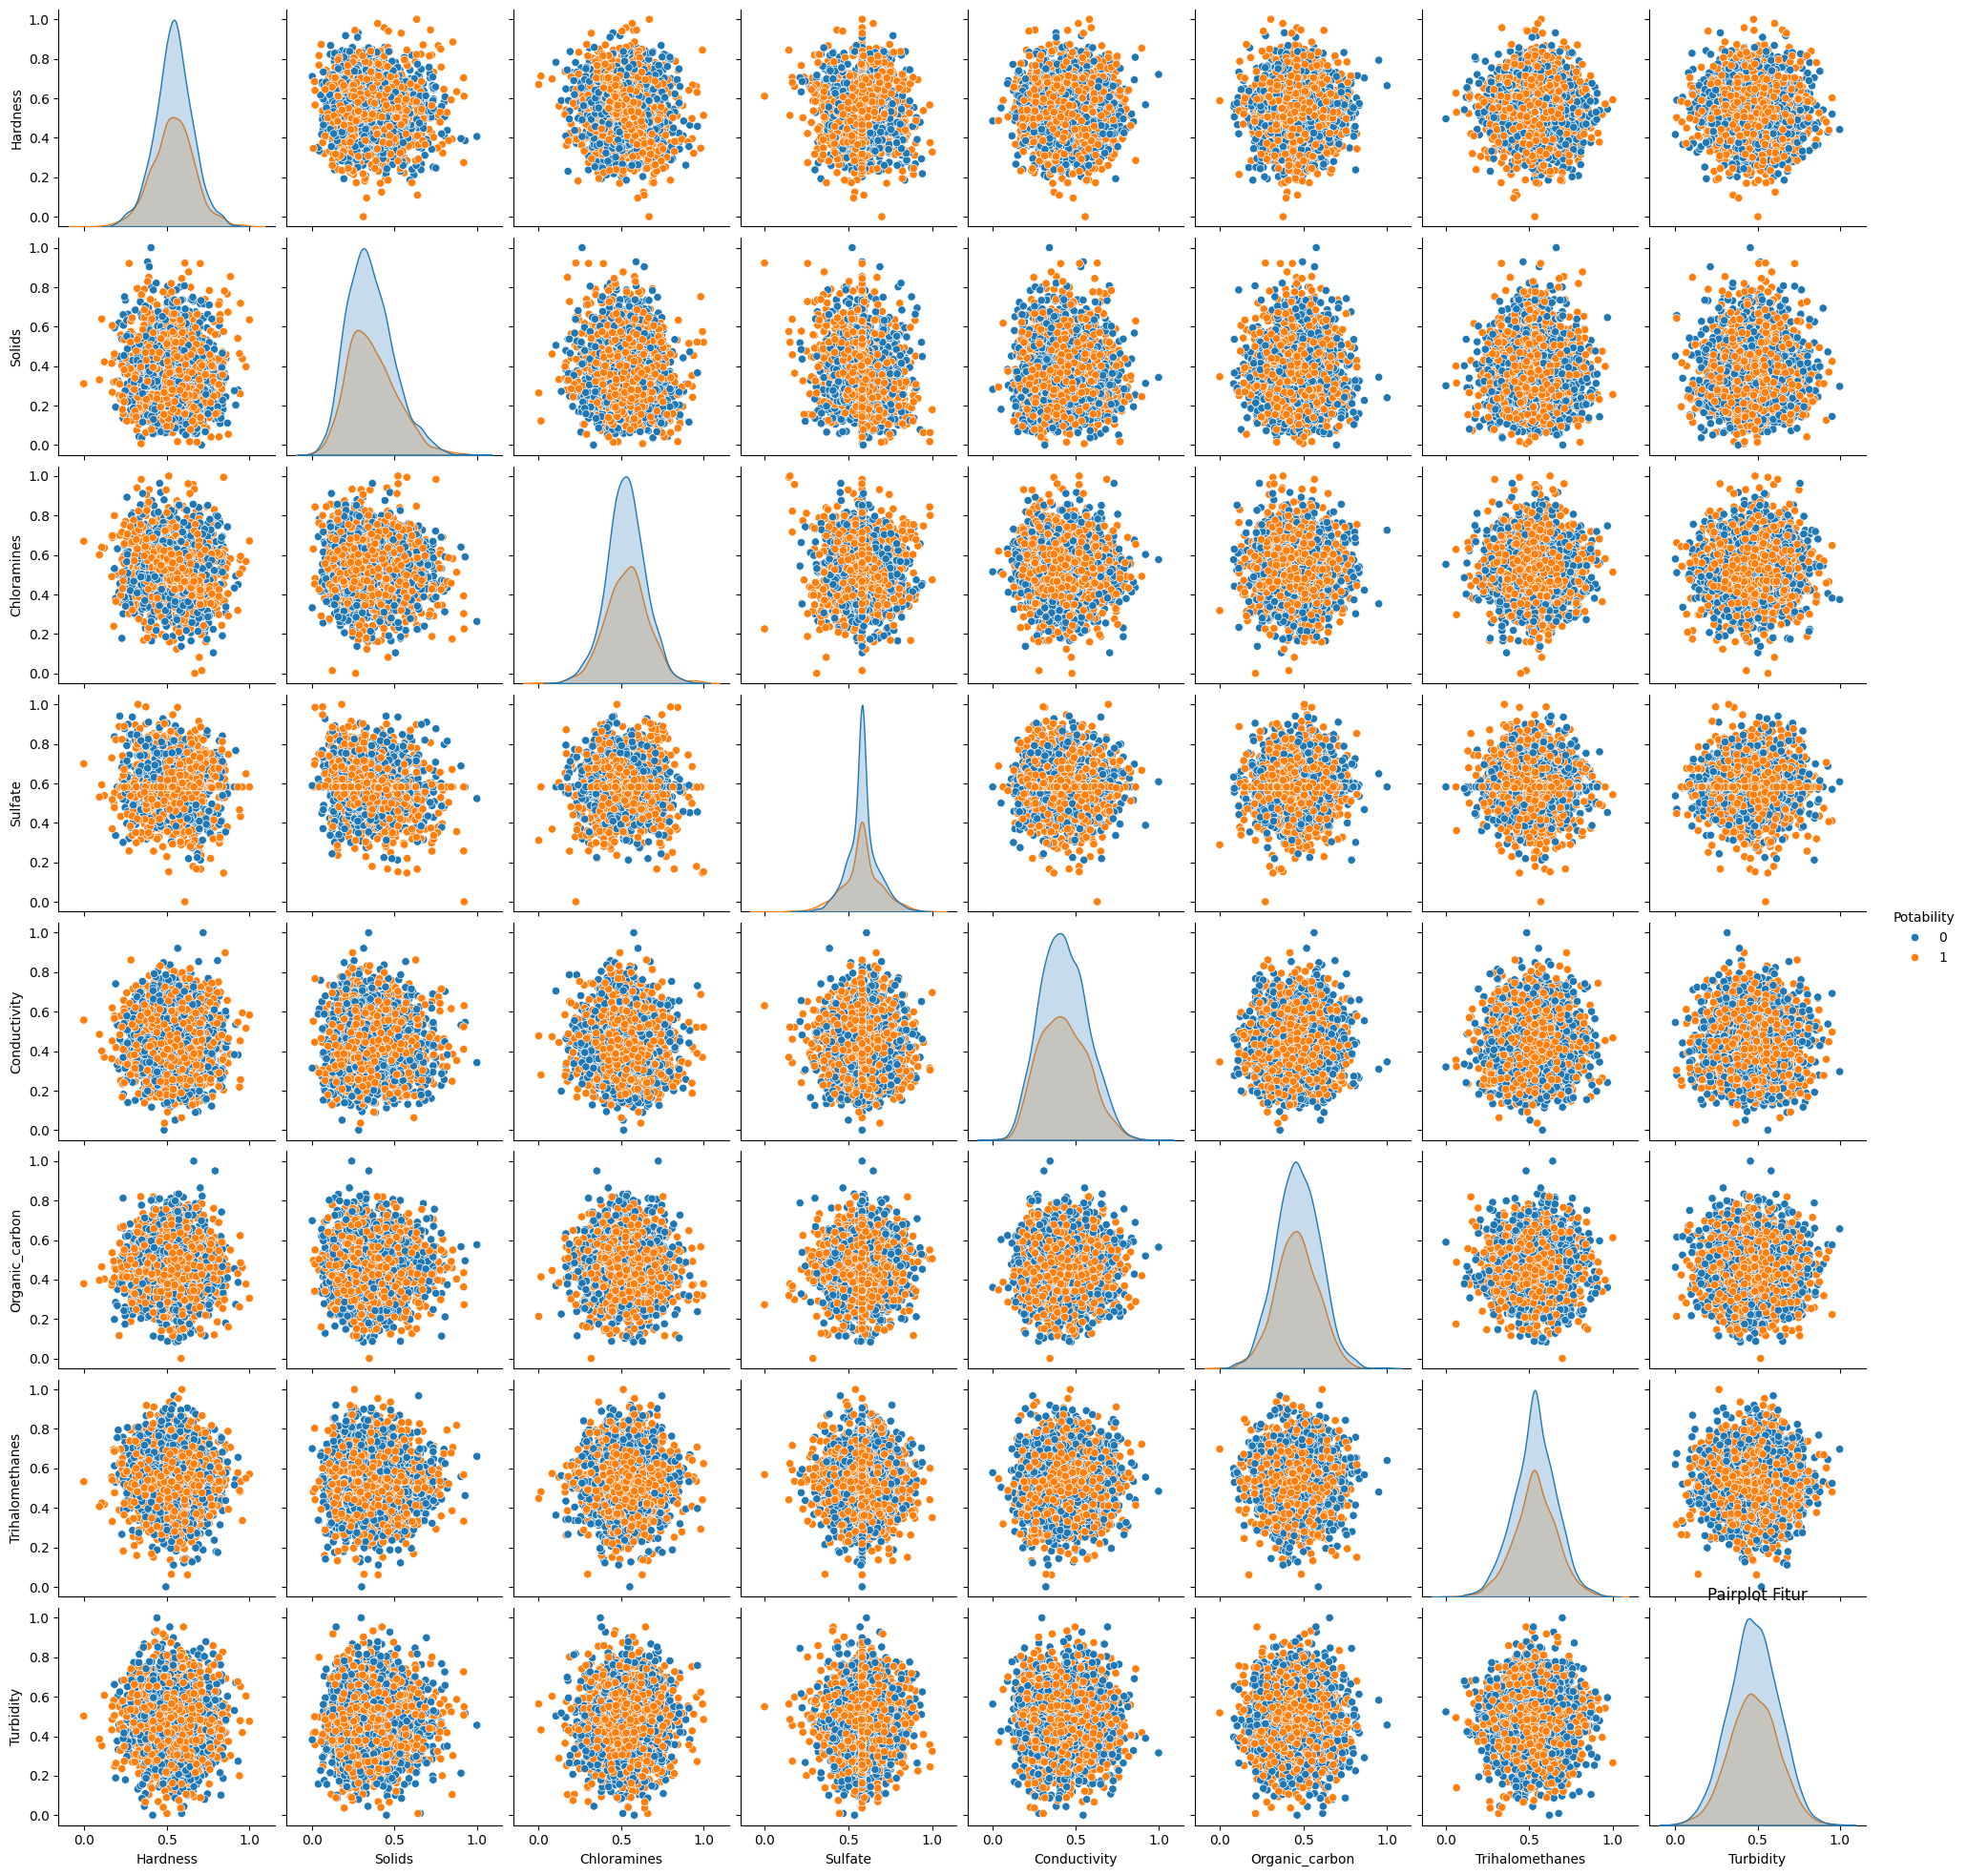

In [52]:
# Pairplot untuk eksplorasi hubungan antar fitur dan target
sns.pairplot(data_normalized, vars=outlier_columns, hue="Potability", diag_kind="kde")
plt.title("Pairplot Fitur")
plt.show()

In [53]:
# Mengatasi imbalance pada variable target
# Normalisasi data menggunakan Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# Mengatasi imbalance menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Distribusi Target Setelah SMOTE:
Potability
0    1998
1    1998
Name: count, dtype: int64


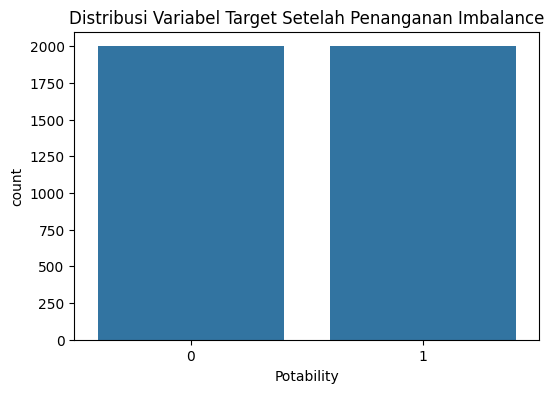

In [55]:
# Cek distribusi setelah SMOTE
print("\nDistribusi Target Setelah SMOTE:")
print(pd.Series(y_resampled).value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Distribusi Variabel Target Setelah Penanganan Imbalance")
plt.show()

In [56]:
# Menampilkan data setelah SMOTE
print("\nData setelah SMOTE:")
print(X_resampled[:5])
print(y_resampled[:5])


Data setelah SMOTE:
[[0.57113901 0.33609646 0.54389134 0.68038521 0.66943948 0.31340165
  0.69975313 0.28609102]
 [0.29740043 0.30061142 0.49183921 0.58169873 0.71941108 0.49731851
  0.4509993  0.57679264]
 [0.64131081 0.32161885 0.69854275 0.58169873 0.41465206 0.56201674
  0.5328657  0.30363656]
 [0.60553587 0.35624379 0.60331369 0.64734744 0.31788047 0.62208906
  0.80806473 0.60101542]
 [0.48485088 0.28992169 0.48490019 0.51454537 0.37933671 0.35855477
  0.25360608 0.49632736]]
0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64


6) KONSTRUKSI DATA

7) PEMODELAN

In [57]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Membagi data sebelum normalisasi
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Model sebelum normalisasi
models_raw = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}
# Model setelah normalisasi
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC()
}
accuracy_results_raw = {}
accuracy_results = {}

In [59]:
for model_name, model in models_raw.items():
    print(f"\nTraining model (tanpa normalisasi): {model_name}")
    model.fit(X_train_raw, y_train_raw)
    y_pred_raw = model.predict(X_test_raw)
    accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)
    accuracy_results_raw[model_name] = accuracy_raw
    print(f"Accuracy (tanpa normalisasi): {accuracy_raw:.4f}")
    print(classification_report(y_test_raw, y_pred_raw))


Training model (tanpa normalisasi): Logistic Regression
Accuracy (tanpa normalisasi): 0.6280
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656


Training model (tanpa normalisasi): Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (tanpa normalisasi): 0.6357
              precision    recall  f1-score   support

           0       0.66      0.86      0.75       412
           1       0.52      0.25      0.34       244

    accuracy                           0.64       656
   macro avg       0.59      0.56      0.54       656
weighted avg       0.61      0.64      0.60       656


Training model (tanpa normalisasi): Support Vector Machine
Accuracy (tanpa normalisasi): 0.6280
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
for model_name, model in models.items():
    print(f"\nTraining model (normaliasi): {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy
    print(f"Accuracy (normalisasi): {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Training model (normaliasi): Logistic Regression
Accuracy (normalisasi): 0.5138
              precision    recall  f1-score   support

           0       0.51      0.57      0.53       394
           1       0.52      0.46      0.49       406

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800


Training model (normaliasi): Random Forest
Accuracy (normalisasi): 0.7225
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       394
           1       0.73      0.71      0.72       406

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800


Training model (normaliasi): Support Vector Machine
Accuracy (normalisasi): 0.5962
              precision    recall  f1-score   support

           0       0.58      0.68      0.62       3

In [61]:
# Perbandingan hasil akurasi sebelum dan sesudah normalisasi
print("\nHasil Akurasi Model (Perbandingan):")
for model_name in models.keys():
    print(f"{model_name}: Tanpa Normalisasi ({accuracy_results_raw[model_name]:.4f}), Dengan Normalisasi ({accuracy_results[model_name]:.4f})")


Hasil Akurasi Model (Perbandingan):
Logistic Regression: Tanpa Normalisasi (0.6280), Dengan Normalisasi (0.5138)
Random Forest: Tanpa Normalisasi (0.6357), Dengan Normalisasi (0.7225)
Support Vector Machine: Tanpa Normalisasi (0.6280), Dengan Normalisasi (0.5962)


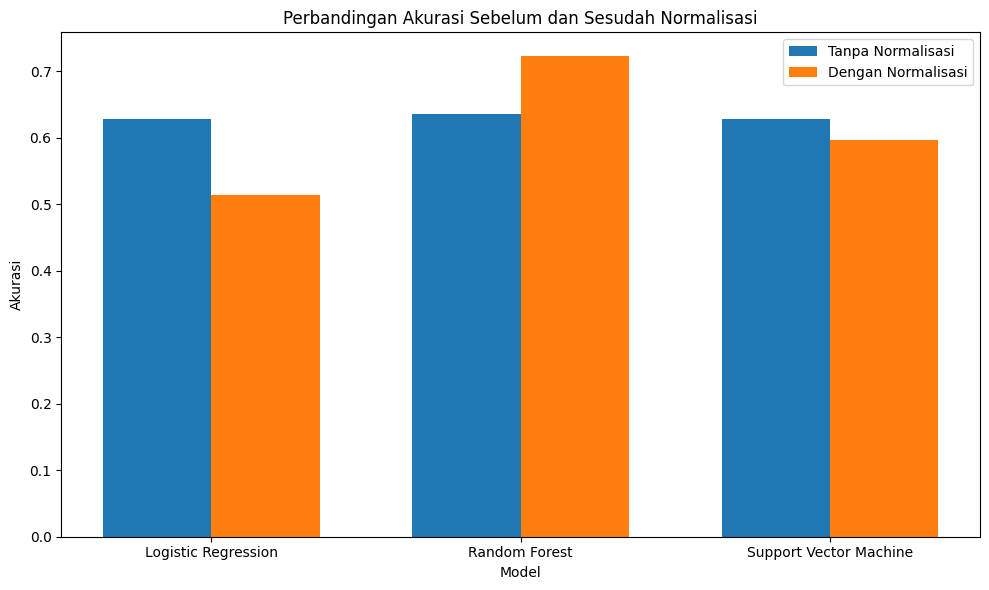

In [62]:
# Visualisasi hasil akurasi
labels = models.keys()
raw_acc = list(accuracy_results_raw.values())
norm_acc = list(accuracy_results.values())

x = np.arange(len(labels))  # Lokasi label
width = 0.35  # Lebar bar

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, raw_acc, width, label='Tanpa Normalisasi')
rects2 = ax.bar(x + width/2, norm_acc, width, label='Dengan Normalisasi')

# Tambahkan teks, label, dan judul
ax.set_xlabel('Model')
ax.set_ylabel('Akurasi')
ax.set_title('Perbandingan Akurasi Sebelum dan Sesudah Normalisasi')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

Confusion matrix model: Logistic Regression


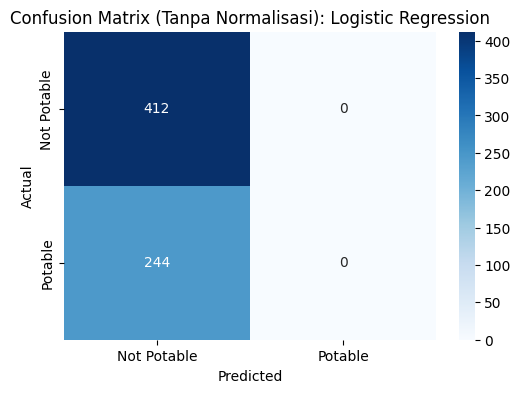

Confusion matrix model: Random Forest


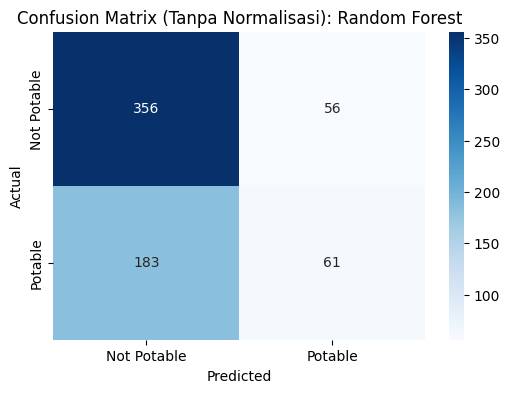

Confusion matrix model: Support Vector Machine


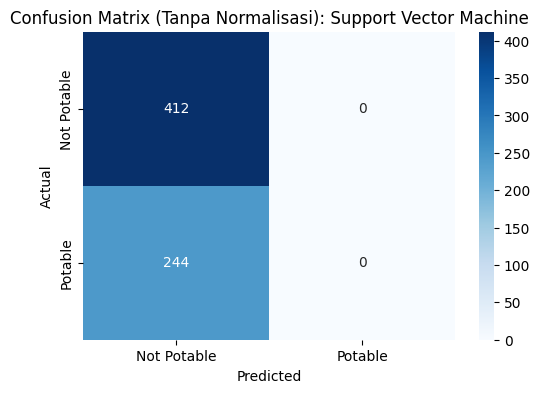

In [63]:
for model_name, model in models_raw.items():
    print(f"Confusion matrix model: {model_name}")
    y_pred_raw = model.predict(X_test_raw)
    # Confusion Matrix
    cm = confusion_matrix(y_test_raw, y_pred_raw)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
    plt.title(f"Confusion Matrix (Tanpa Normalisasi): {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Confusion matrix model: Logistic Regression


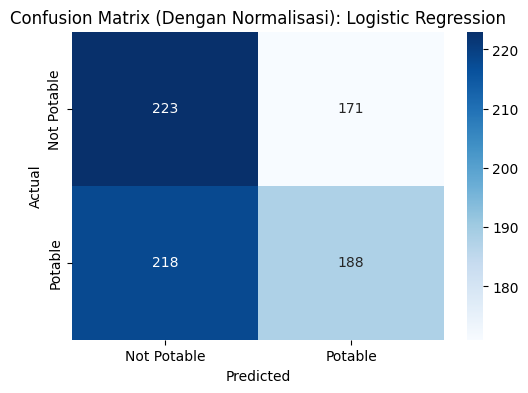

Confusion matrix model: Random Forest


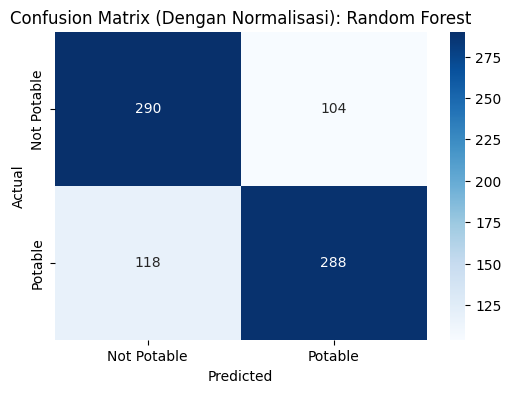

Confusion matrix model: Support Vector Machine


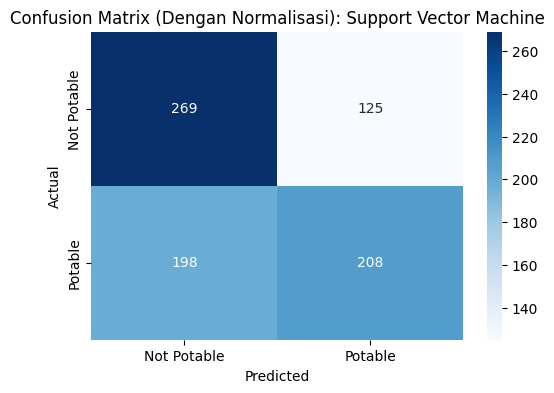

In [64]:
for model_name, model in models.items():
    print(f"Confusion matrix model: {model_name}")
    y_pred = model.predict(X_test)
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
    plt.title(f"Confusion Matrix (Dengan Normalisasi): {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

8) EVALUASI

Setelah melakukan pemodelan data, didapatkan model terbaik dengan menggunakan random forest dan data dinormalisasi.

9) DEPLOYMENT

In [65]:
# Melatih model Random Forest
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Simpan model dan scaler ke dalam file pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model dan scaler telah disimpan.")

Model dan scaler telah disimpan.


10) KESIMPULAN

1. Tingkat Akurasi Setiap Algoritma

Logistic Regression:
- Tanpa normalisasi: ~63%
- Dengan normalisasi: ~50%

Random Forest:
- Tanpa normalisasi: ~66%
- Dengan normalisasi: ~72% (tertinggi di antara semua algoritma).

Support Vector Machine (SVM):
- Tanpa normalisasi: ~62%
- Dengan normalisasi: ~59%.


2. Keunggulan dan Keterbatasan

**Logistic Regression**

Keunggulan:
- Cepat untuk diimplementasikan dan memiliki interpretasi yang mudah.
- Cocok untuk hubungan linear sederhana antara fitur dan target.

Keterbatasan:
- Akurasi menurun setelah normalisasi, menunjukkan algoritma ini kurang optimal untuk kasus ini.
- Tidak efektif untuk menangani data yang memiliki hubungan non-linear.

**Random Forest**

Keunggulan:
- Memberikan akurasi tertinggi (~72%) setelah normalisasi.
- Mampu menangani data dengan hubungan non-linear.
- Robust terhadap outlier dan imbalance data (dengan bantuan SMOTE).

Keterbatasan:
- Lebih lambat dibandingkan Logistic Regression karena melibatkan banyak pohon keputusan.
- Konsumsi memori lebih besar dibandingkan algoritma lain.

**Support Vector Machine (SVM)**

Keunggulan:
- Baik untuk menangani dataset yang memiliki dimensi tinggi.
- Performa cukup baik tanpa normalisasi (~62%).

Keterbatasan:
- Akurasi menurun setelah normalisasi (~59%), menunjukkan model ini kurang cocok untuk kasus ini.
- Waktu komputasi lebih lambat dibandingkan Logistic Regression, terutama untuk dataset besar.

3. Rekomendasi Algoritma yang Paling Efektif

Algoritma yang Direkomendasikan: **Random Forest**

Alasan:
- Memberikan akurasi tertinggi di antara semua algoritma (~72% setelah normalisasi).
- Algoritma ini mampu menangani hubungan non-linear antara fitur dan target, yang kemungkinan besar terjadi dalam kasus kualitas air.
- Mampu menangani fitur yang tidak memiliki korelasi langsung dengan target (variabel independen).
- Robust terhadap outlier dan bekerja baik dengan data yang telah dinormalisasi.